# Gradient Approach

In [2]:
import os

import numpy as np
from matplotlib import pyplot as plt
from utils.edge_extraction import *
import cv2
from utils.feature_extraction import *
from utils.image_conversion import *

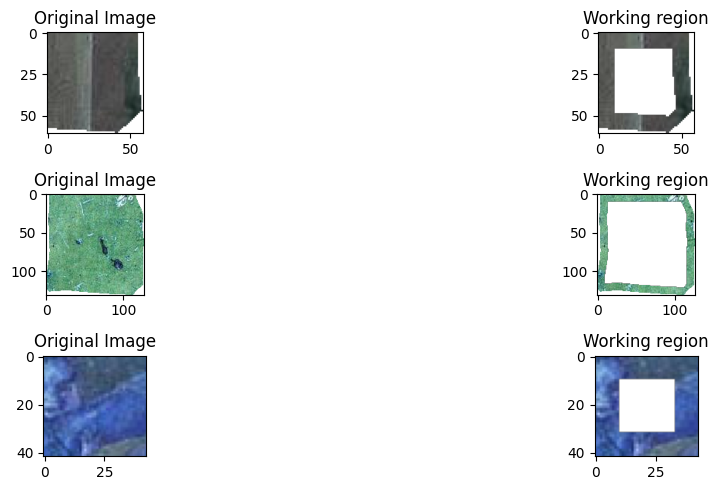

In [3]:
image_green1 = cv2.imread("data/5.35.1.png", cv2.IMREAD_UNCHANGED)
image_green2 = cv2.imread("data/5.34.2.png", cv2.IMREAD_UNCHANGED)
image_yellow = cv2.imread("data/5.33.3.png", cv2.IMREAD_UNCHANGED)

working_region_image_green1 = extract_working_region(image_green1, threshold=10)
working_region_image_green2 = extract_working_region(image_green2, threshold=10)
working_region_image_yellow = extract_working_region(image_yellow, threshold=10)

fig, axes = plt.subplots(3, 2, figsize=(15, 5))
images = [image_green1, working_region_image_green1, image_green2, working_region_image_green2, image_yellow, working_region_image_yellow]
titles = ["Original Image", "Working region"]

for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        ax.imshow(images[i * 2 + j])
        ax.set_title(titles[j])

plt.tight_layout()
plt.show()

In [4]:
def get_only_valid_pixels(input_image: np.ndarray) -> np.ndarray:
    # Extract pixels with alpha channel value different from 0
    valid_pixels = input_image[input_image[:, :, 3] != 0]

    # Reshape to (num_pixels, 4)
    reshaped_image = valid_pixels.reshape((-1, 4))

    # Determine the dimensions of the reshaped image
    num_pixels = reshaped_image.shape[0]
    width = int(np.sqrt(num_pixels))
    height = (num_pixels + width - 1) // width

    # Pad the reshaped image to make it rectangular
    padded_image = np.zeros((height * width, 4), dtype=np.uint8)
    padded_image[:num_pixels, :] = reshaped_image

    # Reshape the padded image to the desired dimensions
    final_image = padded_image.reshape((height, width, 4))

    # Split channel
    b, g, r, a = cv2.split(final_image)
    rgb_image = cv2.merge((b, g, r))

    return rgb_image

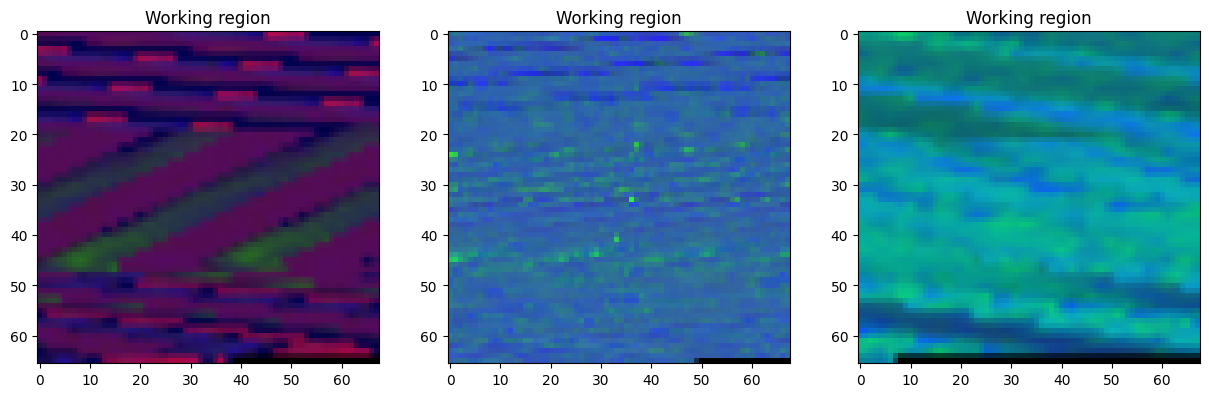

In [5]:
working_region_image_green1 = get_only_valid_pixels(working_region_image_green1)
working_region_image_green2 = get_only_valid_pixels(working_region_image_green2)
working_region_image_yellow = get_only_valid_pixels(working_region_image_yellow)

working_region_image_green1 = cv.cvtColor(working_region_image_green1, cv.COLOR_BGR2HSV)
working_region_image_green2 = cv.cvtColor(working_region_image_green2, cv.COLOR_BGR2HSV)
working_region_image_yellow = cv.cvtColor(working_region_image_yellow, cv.COLOR_BGR2HSV)

max_x = max(working_region_image_green1.shape[0], working_region_image_green2.shape[0], working_region_image_yellow.shape[0])
max_y = max(working_region_image_green1.shape[1], working_region_image_green2.shape[1], working_region_image_yellow.shape[1])

working_region_image_green1 = cv2.resize(working_region_image_green1, (max_x, max_y))
working_region_image_green2 = cv2.resize(working_region_image_green2, (max_x, max_y))
working_region_image_yellow = cv2.resize(working_region_image_yellow, (max_x, max_y))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
images = [working_region_image_green1, working_region_image_green2,working_region_image_yellow]
titles = ["Working region"]

for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title(titles[0])

plt.show()

In [6]:
from utils.clustering import create_dataset, compute_jacobians_dist_matrix

X = create_dataset(img_dir="./data", threshold=5)
dist_matrix = compute_jacobians_dist_matrix(X)
dist_matrix.shape

Calculating similarities: 100%|██████████| 328/328 [00:50<00:00,  6.45it/s]


(328, 328)

In [7]:
dist_matrix

array([[   0.        , 1077.27117977, 1159.61433983, ..., 1330.2138239 ,
        1044.78468221, 1053.37897615],
       [1077.27117977,    0.        ,  931.86739338, ..., 1118.59913099,
         680.32583315,  616.3377095 ],
       [1159.61433983,  931.86739338,    0.        , ..., 1175.0951642 ,
         897.18877336,  892.3093889 ],
       ...,
       [1330.2138239 , 1118.59913099, 1175.0951642 , ...,    0.        ,
        1092.36494598, 1090.73814265],
       [1044.78468221,  680.32583315,  897.18877336, ..., 1092.36494598,
           0.        ,  641.86605632],
       [1053.37897615,  616.3377095 ,  892.3093889 , ..., 1090.73814265,
         641.86605632,    0.        ]])

In [8]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=100, min_samples=5, metric="precomputed").fit(dist_matrix)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 0
Estimated number of noise points: 328


In [9]:
from utils.clustering import create_cluster_dirs

create_cluster_dirs(data_dir="./data", output_dir="clusters/jacobians", labels=labels)

Creating cluster dirs: 100%|██████████| 328/328 [00:00<00:00, 2684.15it/s]


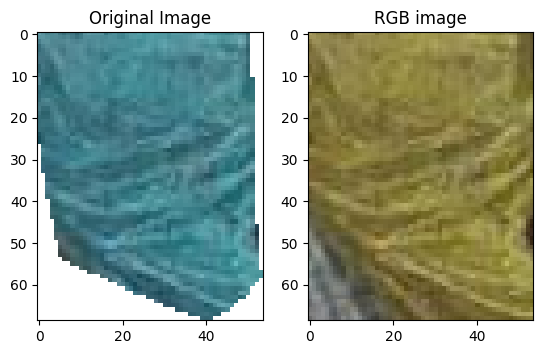

In [11]:
img = cv.imread("data/5.35.3.png", cv.IMREAD_UNCHANGED)
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(rgb_img)
plt.title("RGB image")
plt.show()

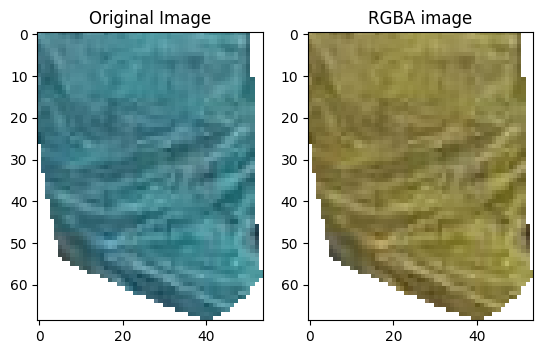

In [16]:
b, g, r,a = cv.split(img)
rgba_img = np.dstack((r, g, b, a))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(rgba_img)
plt.title("RGBA image")
plt.show()

In [12]:
print(img.shape)
print(rgb_img.shape)

(69, 54, 4)
(69, 54, 3)


In [13]:
img

array([[[100, 158, 170, 251],
        [ 87, 145, 157, 251],
        [ 74, 133, 143, 251],
        ...,
        [ 44,  93, 103,   0],
        [ 48,  93, 104,   0],
        [ 42,  82,  94,   0]],

       [[ 88, 146, 158, 251],
        [ 90, 148, 160, 251],
        [ 82, 141, 151, 251],
        ...,
        [ 51, 100, 110,   0],
        [ 52,  97, 108,   0],
        [ 45,  85,  97,   0]],

       [[ 69, 124, 137, 251],
        [ 87, 142, 155, 251],
        [ 88, 144, 155, 251],
        ...,
        [ 54, 100, 111,   0],
        [ 54,  99, 110,   0],
        [ 49,  89, 101,   0]],

       ...,

       [[119, 119, 119,   0],
        [122, 122, 122,   0],
        [132, 130, 129,   0],
        ...,
        [ 52, 121, 131,   0],
        [ 50, 119, 129,   0],
        [ 64, 135, 145,   0]],

       [[127, 127, 127,   0],
        [130, 130, 130,   0],
        [137, 135, 134,   0],
        ...,
        [ 94, 158, 169,   0],
        [ 96, 162, 173,   0],
        [105, 171, 182,   0]],

       [[106

In [14]:
rgb_img

array([[[170, 158, 100],
        [157, 145,  87],
        [143, 133,  74],
        ...,
        [103,  93,  44],
        [104,  93,  48],
        [ 94,  82,  42]],

       [[158, 146,  88],
        [160, 148,  90],
        [151, 141,  82],
        ...,
        [110, 100,  51],
        [108,  97,  52],
        [ 97,  85,  45]],

       [[137, 124,  69],
        [155, 142,  87],
        [155, 144,  88],
        ...,
        [111, 100,  54],
        [110,  99,  54],
        [101,  89,  49]],

       ...,

       [[119, 119, 119],
        [122, 122, 122],
        [129, 130, 132],
        ...,
        [131, 121,  52],
        [129, 119,  50],
        [145, 135,  64]],

       [[127, 127, 127],
        [130, 130, 130],
        [134, 135, 137],
        ...,
        [169, 158,  94],
        [173, 162,  96],
        [182, 171, 105]],

       [[106, 106, 106],
        [125, 125, 125],
        [137, 138, 140],
        ...,
        [127, 115,  55],
        [133, 122,  60],
        [137, 126,  64]]